### Drive mount


In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


### Import packages

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import os
from sklearn.model_selection import train_test_split
import tensorflow as tf

In [ ]:
train=pd.read_csv("/content/drive/MyDrive/mnist_train.csv")
train.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
test=pd.read_csv("/content/drive/MyDrive/mnist_test.csv")
test.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
test.columns

Index(['label', '1x1', '1x2', '1x3', '1x4', '1x5', '1x6', '1x7', '1x8', '1x9',
       ...
       '28x19', '28x20', '28x21', '28x22', '28x23', '28x24', '28x25', '28x26',
       '28x27', '28x28'],
      dtype='object', length=785)

In [ ]:
X_train = train.iloc[:, 1:]
y_train = train.iloc[:, 0]

In [ ]:
X_test = test.iloc[:, 1:]
y_test = test.iloc[:, 0]

In [ ]:
X_train.shape

(60000, 784)

In [ ]:
y_train.shape

(60000,)

In [ ]:
X_test.shape

(10000, 784)

In [ ]:
y_test.shape

(10000,)

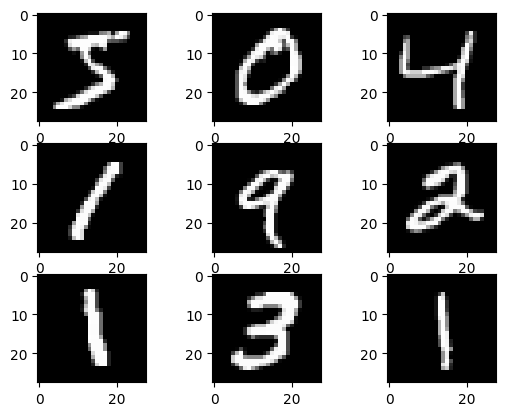

In [ ]:
fig, axs = plt.subplots(3, 3)
cnt = 0
for i in range(3):
    for j in range(3):
        axs[i, j].imshow(X_train.iloc[cnt].values.reshape(28, 28), cmap='gray')
        cnt += 1

plt.show()

### Normaliztion using MinMaxScaler

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Assuming X_train and X_test are your feature matrices
scaler = MinMaxScaler()

# Fit the scaler on the training data and transform both training and test data
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


### Tensor flow inbuilt model

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))

### Activation function for hidden layer neurons
  `*`As it is classification model using Relu for hidden layers`*`

In [ ]:
model.add(tf.keras.layers.Dense(units=128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(units=128, activation=tf.nn.relu))

In [ ]:
model.add(tf.keras.layers.Dense(units=10, activation=tf.nn.softmax))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 10)                7850      
                                                                 
Total params: 7850 (30.66 KB)
Trainable params: 7850 (30.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
X_train_reshaped = X_train.reshape(-1, 28, 28)

In [ ]:
model.fit(X_train_reshaped, y_train, epochs=10, batch_size=100)

Epoch 1/10
600/600 [==============================] - 2s 2ms/step - loss: 0.6161 - accuracy: 0.8458
Epoch 2/10
600/600 [==============================] - 1s 2ms/step - loss: 0.3457 - accuracy: 0.9059
Epoch 3/10
600/600 [==============================] - 1s 2ms/step - loss: 0.3092 - accuracy: 0.9144
Epoch 4/10
600/600 [==============================] - 1s 2ms/step - loss: 0.2923 - accuracy: 0.9193
Epoch 5/10
600/600 [==============================] - 1s 2ms/step - loss: 0.2817 - accuracy: 0.9214
Epoch 6/10
600/600 [==============================] - 2s 3ms/step - loss: 0.2746 - accuracy: 0.9234
Epoch 7/10
600/600 [==============================] - 2s 3ms/step - loss: 0.2694 - accuracy: 0.9250
Epoch 8/10
600/600 [==============================] - 3s 4ms/step - loss: 0.2653 - accuracy: 0.9261
Epoch 9/10
600/600 [==============================] - 1s 2ms/step - loss: 0.2618 - accuracy: 0.9271
Epoch 10/10
600/600 [==============================] - 1s 2ms/step - loss: 0.2589 - accuracy: 0.9282

In [ ]:
X_test_reshaped = X_test.reshape(-1, 28, 28)
loss, accuracy = model.evaluate(X_test_reshaped , y_test)
print(loss)
print(accuracy)

313/313 [==============================] - 1s 3ms/step - loss: 0.2651 - accuracy: 0.9269
0.26508060097694397
0.9269000291824341


In [ ]:
prediction = model.predict([X_test_reshaped])
prediction

313/313 [==============================] - 1s 1ms/step


array([[7.8784806e-06, 7.3290360e-11, 4.0112653e-05, ..., 9.9308664e-01,
        3.1007745e-05, 5.8242131e-04],
       [3.6990005e-04, 3.6118938e-06, 9.9024910e-01, ..., 7.6564902e-16,
        9.3304094e-05, 6.2521581e-12],
       [3.0884803e-06, 9.7464132e-01, 1.4232506e-02, ..., 1.3404571e-03,
        4.0630004e-03, 3.7028469e-04],
       ...,
       [1.3213823e-08, 2.2860849e-08, 1.0261316e-05, ..., 9.4705872e-04,
        5.6157070e-03, 1.9023679e-02],
       [2.2562934e-07, 4.8864155e-07, 7.7454501e-07, ..., 9.9761472e-08,
        5.2529867e-03, 3.9209081e-07],
       [2.4112794e-06, 1.6999612e-13, 8.6172346e-05, ..., 1.4609107e-11,
        5.4301040e-08, 7.4437273e-10]], dtype=float32)

In [ ]:
print('Probabilities: ', prediction[10])
print('\n')
print('Prediction: ', np.argmax(prediction[10]))

Probabilities:  [9.8876578e-01 3.2619321e-10 1.3260467e-03 1.4218863e-04 2.3172527e-07
 8.0109267e-03 5.4681019e-05 3.3891734e-08 1.6994355e-03 6.9691993e-07]


Prediction:  0


######.

In [ ]:
import numpy as np

X_train_reshaped = X_train.reshape(28*28, -1)

def initialize_parameters(input_size, hidden_size, output_size):
    np.random.seed(42)
    W1 = np.random.randn(hidden_size, input_size) * 0.01
    b1 = np.zeros((hidden_size, 1))
    W2 = np.random.randn(output_size, hidden_size) * 0.01
    b2 = np.zeros((output_size, 1))

    parameters = {
        'W1': W1,
        'b1': b1,
        'W2': W2,
        'b2': b2
    }

    return parameters

def relu(Z):
    return np.maximum(0, Z)

def softmax(Z):
    expZ = np.exp(Z - np.max(Z))  # Avoiding numerical instability
    return expZ / expZ.sum(axis=0, keepdims=True)

def forward_propagation(X, parameters):
    W1, b1, W2, b2 = parameters['W1'], parameters['b1'], parameters['W2'], parameters['b2']

    Z1 = np.dot(W1, X) + b1
    A1 = relu(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = softmax(Z2)

    cache = {
        'Z1': Z1,
        'A1': A1,
        'Z2': Z2,
        'A2': A2
    }

    return A2, cache

def compute_cost(A2, Y):
    m = Y.shape[1]
    cost = -(1/m) * np.sum(Y * np.log(A2 + 1e-8))  # Avoiding numerical instability
    return cost

def backward_propagation(X, Y, parameters, cache):
    m = X.shape[1]
    W1, W2 = parameters['W1'], parameters['W2']
    A1, A2 = cache['A1'], cache['A2']

    dZ2 = A2 - Y
    dW2 = (1/m) * np.dot(dZ2, A1.T)
    db2 = (1/m) * np.sum(dZ2, axis=1, keepdims=True)

    # Transpose X before performing the dot product
    dZ1 = np.dot(W2.T, dZ2) * (A1 > 0)
    dW1 = (1/m) * np.dot(dZ1, X.T)  # Transpose X here
    db1 = (1/m) * np.sum(dZ1, axis=1, keepdims=True)

    grads = {
        'dW1': dW1,
        'db1': db1,
        'dW2': dW2,
        'db2': db2
    }

    return grads


def update_parameters(parameters, grads, learning_rate=0.01):
    W1, b1, W2, b2 = parameters['W1'], parameters['b1'], parameters['W2'], parameters['b2']
    dW1, db1, dW2, db2 = grads['dW1'], grads['db1'], grads['dW2'], grads['db2']

    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2

    updated_parameters = {
        'W1': W1,
        'b1': b1,
        'W2': W2,
        'b2': b2
    }

    return updated_parameters

def train_neural_network(X_train, y_train, input_size, hidden_size, output_size, epochs=100, learning_rate=0.01):
    parameters = initialize_parameters(input_size, hidden_size, output_size)

    for epoch in range(epochs):
        A2, cache = forward_propagation(X_train, parameters)
        cost = compute_cost(A2, y_train)
        grads = backward_propagation(X_train, y_train, parameters, cache)
        parameters = update_parameters(parameters, grads, learning_rate)

        if epoch % 10 == 0:
            print(f"Epoch {epoch}, Cost: {cost}")

    return parameters

def predict(X, parameters):
    A2, _ = forward_propagation(X, parameters)
    return np.argmax(A2, axis=0)

input_size = X_train_reshaped.shape[0]
hidden_size = 128
output_size = 10

# Train the neural network
trained_parameters = train_neural_network(X_train_reshaped, y_train, input_size, hidden_size, output_size, epochs=100, learning_rate=0.01)

# Make predictions
predictions = predict(X_test_reshaped, trained_parameters)

# Evaluate accuracy
accuracy = np.mean(predictions == y_test)
print(f"Test Accuracy: {accuracy}")


Epoch 0, Cost: 102.55639181480882
Epoch 10, Cost: 102.78152284131525


<ipython-input-53-93428a693f10>:26: RuntimeWarning: invalid value encountered in divide
  return expZ / expZ.sum(axis=0, keepdims=True)


Epoch 20, Cost: nan
Epoch 30, Cost: nan
Epoch 40, Cost: nan
Epoch 50, Cost: nan
Epoch 60, Cost: nan
Epoch 70, Cost: nan
Epoch 80, Cost: nan
Epoch 90, Cost: nan


ValueError: shapes (128,784) and (10000,28,28) not aligned: 784 (dim 1) != 28 (dim 1)

In [ ]:
import numpy as np

def relu(x):
    return np.maximum(0, x)

def softmax(x):
    exp_x = np.exp(x - np.max(x, axis=-1, keepdims=True))
    return exp_x / np.sum(exp_x, axis=-1, keepdims=True)

def sparse_categorical_crossentropy(y_true, y_pred):
    m = y_true.shape[0]
    p = softmax(y_pred)
    log_likelihood = -np.log(p[range(m), y_true])
    loss = np.sum(log_likelihood) / m
    return loss

def relu_derivative(x):
    return np.where(x > 0, 1, 0)

def softmax_derivative(x):
    p = softmax(x)
    return p * (1 - p)

def initialize_parameters(input_size, hidden_size, output_size):
    np.random.seed(42)
    W1 = np.random.randn(input_size, hidden_size) * 0.01
    b1 = np.zeros((1, hidden_size))
    W2 = np.random.randn(hidden_size, hidden_size) * 0.01
    b2 = np.zeros((1, hidden_size))
    W3 = np.random.randn(hidden_size, output_size) * 0.01
    b3 = np.zeros((1, output_size))

    return {'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2, 'W3': W3, 'b3': b3}

def forward_propagation(X, parameters):
    Z1 = np.dot(X, parameters['W1']) + parameters['b1']
    A1 = relu(Z1)
    Z2 = np.dot(A1, parameters['W2']) + parameters['b2']
    A2 = relu(Z2)
    Z3 = np.dot(A2, parameters['W3']) + parameters['b3']
    A3 = softmax(Z3)

    return {'Z1': Z1, 'A1': A1, 'Z2': Z2, 'A2': A2, 'Z3': Z3, 'A3': A3}

def backward_propagation(X, Y, parameters, cache):
    m = X.shape[0]

    eye_matrix = np.eye(10)[Y].reshape(m, 1, -1)  # Create a one-hot encoded matrix with shape (m, 1, 10)
    dZ3 = cache['A3'] - eye_matrix.reshape(m, 1, -1)
    dW3 = np.dot(cache['A2'].T, dZ3) / m
    db3 = np.sum(dZ3, axis=0, keepdims=True) / m

    dA2 = np.dot(dZ3, parameters['W3'].T)
    dZ2 = dA2 * relu_derivative(cache['Z2'])
    dW2 = np.dot(cache['A1'].T, dZ2) / m
    db2 = np.sum(dZ2, axis=0, keepdims=True) / m

    dA1 = np.dot(dZ2, parameters['W2'].T)
    dZ1 = dA1 * relu_derivative(cache['Z1'])
    dW1 = np.dot(X.T, dZ1) / m
    db1 = np.sum(dZ1, axis=0, keepdims=True) / m

    gradients = {'dW1': dW1, 'db1': db1, 'dW2': dW2, 'db2': db2, 'dW3': dW3, 'db3': db3}

    return gradients

def update_parameters(parameters, gradients, learning_rate):
    parameters['W1'] -= learning_rate * gradients['dW1']
    parameters['b1'] -= learning_rate * gradients['db1']
    parameters['W2'] -= learning_rate * gradients['dW2']
    parameters['b2'] -= learning_rate * gradients['db2']
    parameters['W3'] -= learning_rate * gradients['dW3']
    parameters['b3'] -= learning_rate * gradients['db3']

def train_model(X, y, epochs, learning_rate, batch_size):
    input_size = X.shape[1]
    hidden_size = 128
    output_size = 10

    parameters = initialize_parameters(input_size, hidden_size, output_size)

    for epoch in range(epochs):
        for i in range(0, X.shape[0], batch_size):
            X_batch = X[i:i+batch_size]
            y_batch = y[i:i+batch_size]

            cache = forward_propagation(X_batch, parameters)
            gradients = backward_propagation(X_batch, y_batch, parameters, cache)
            update_parameters(parameters, gradients, learning_rate)

    return parameters

X_train_reshaped = X_train.reshape(-1, 28 * 28)
X_test_reshaped = X_test.reshape(-1, 28 * 28)

# Train the model
trained_parameters = train_model(X_train_reshaped, y_train, epochs=10, learning_rate=0.001, batch_size=100)

# Test the model
test_cache = forward_propagation(X_test_reshaped, trained_parameters)
test_loss = sparse_categorical_crossentropy(y_test, test_cache['A3'])
print("Test Loss:", test_loss)


ValueError: operands could not be broadcast together with shapes (100,10) (100,1,6000) 

In [ ]:
import numpy as np

def relu(x):
    return np.maximum(0, x)

def softmax(x):
    exp_x = np.exp(x - np.max(x, axis=0, keepdims=True))
    return exp_x / np.sum(exp_x, axis=0, keepdims=True)

def initialize_parameters(input_size, hidden_size, output_size):
    np.random.seed(42)
    W1 = np.random.randn(hidden_size, input_size) * 0.01
    b1 = np.zeros((hidden_size, 1))
    W2 = np.random.randn(hidden_size, hidden_size) * 0.01
    b2 = np.zeros((hidden_size, 1))
    W3 = np.random.randn(output_size, hidden_size) * 0.01
    b3 = np.zeros((output_size, 1))

    parameters = {
        'W1': W1,
        'b1': b1,
        'W2': W2,
        'b2': b2,
        'W3': W3,
        'b3': b3
    }

    return parameters

def forward_propagation(X, parameters):
    W1, b1, W2, b2, W3, b3 = parameters['W1'], parameters['b1'], parameters['W2'], parameters['b2'], parameters['W3'], parameters['b3']

    Z1 = np.dot(W1, X) + b1
    A1 = relu(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = relu(Z2)
    Z3 = np.dot(W3, A2) + b3
    A3 = softmax(Z3)

    cache = {
        'Z1': Z1,
        'A1': A1,
        'Z2': Z2,
        'A2': A2,
        'Z3': Z3,
        'A3': A3
    }

    return A3, cache

def compute_cost(A3, Y):
    m = Y.shape[1]
    cost = -(1/m) * np.sum(Y * np.log(A3.T + 1e-8))  # Transpose A3 to match the shape of Y
    return cost



def backward_propagation(X, Y, parameters, cache):
    m = X.shape[1]
    W1, W2, W3 = parameters['W1'], parameters['W2'], parameters['W3']
    A1, A2, A3 = cache['A1'], cache['A2'], cache['A3']

    dZ3 = A3 - Y
    dW3 = (1/m) * np.dot(dZ3, A2.T)
    db3 = (1/m) * np.sum(dZ3, axis=1, keepdims=True)

    dA2 = np.dot(W3.T, dZ3)
    dZ2 = dA2 * (A2 > 0)
    dW2 = (1/m) * np.dot(dZ2, A1.T)
    db2 = (1/m) * np.sum(dZ2, axis=1, keepdims=True)

    dA1 = np.dot(W2.T, dZ2)
    dZ1 = dA1 * (A1 > 0)
    dW1 = (1/m) * np.dot(dZ1, X.T)
    db1 = (1/m) * np.sum(dZ1, axis=1, keepdims=True)

    grads = {
        'dW1': dW1,
        'db1': db1,
        'dW2': dW2,
        'db2': db2,
        'dW3': dW3,
        'db3': db3
    }

    return grads

def update_parameters(parameters, grads, learning_rate=0.01):
    for param in parameters:
        parameters[param] -= learning_rate * grads['d' + param]

    return parameters

def train_neural_network(X_train, y_train, input_size, hidden_size, output_size, epochs=100, learning_rate=0.01):
    parameters = initialize_parameters(input_size, hidden_size, output_size)

    for epoch in range(epochs):
        A3, cache = forward_propagation(X_train, parameters)
        print(A3.shape)
        A3 = A3.squeeze()  # Add this line to remove the singleton dimension
        y_train = y_train.reshape(output_size, -1)  # Reshape y_train to (output_size, m)
        print(y_train.shape)
        cost = compute_cost(A3, y_train)
        grads = backward_propagation(X_train, y_train, parameters, cache)
        parameters = update_parameters(parameters, grads, learning_rate)

        if epoch % 10 == 0:
            print(f"Epoch {epoch}, Cost: {cost}")

    return parameters


input_size = X_train_reshaped.shape[0]
hidden_size = 128
output_size = 10

y_train_one_hot = np.eye(output_size)[y_train].T  # Transpose to have shape (output_size, m)

# Train the neural network
trained_parameters = train_neural_network(X_train_reshaped, y_train_one_hot, input_size, hidden_size, output_size, epochs=100, learning_rate=0.01)

# Make predictions
predictions = predict(X_test_reshaped, trained_parameters)

# Evaluate accuracy
accuracy = np.mean(predictions == y_test)
print(f"Test Accuracy: {accuracy}")


(10, 784)
(10, 60000)


ValueError: operands could not be broadcast together with shapes (10,60000) (784,10) 

In [ ]:
import numpy as np

class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size, learning_rate=0.01):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.learning_rate = learning_rate

        # Initialize weights and biases
        self.weights_input_hidden = np.random.randn(hidden_size, input_size) * 0.01
        self.bias_hidden = np.zeros((hidden_size, 1))
        self.weights_hidden_output = np.random.randn(output_size, hidden_size) * 0.01
        self.bias_output = np.zeros((output_size, 1))

    def relu(self, x):
        return np.maximum(0, x)

    def softmax(self, x):
        exp_x = np.exp(x - np.max(x, axis=0, keepdims=True))
        return exp_x / np.sum(exp_x, axis=0, keepdims=True)

    def forward(self, X):
        # Input to Hidden Layer
        self.z_hidden = np.dot(self.weights_input_hidden, X) + self.bias_hidden
        self.a_hidden = self.relu(self.z_hidden)

        # Hidden to Output Layer
        self.z_output = np.dot(self.weights_hidden_output, self.a_hidden) + self.bias_output
        self.a_output = self.softmax(self.z_output)

        return self.a_output

    def compute_cost(self, Y):
        m = Y.shape[1]

        # If self.a_output is a 2D array (matrix)
        if len(self.a_output.shape) == 2:
            cost = -(1/m) * np.sum(Y * np.log(self.a_output + 1e-8))
        else:
            # If self.a_output has more dimensions (e.g., 3D)
            cost = -(1/m) * np.sum(Y * np.log(self.a_output[:, :, 0] + 1e-8))

        return cost


    def backward(self, X, Y):
        m = X.shape[1]

        # Compute gradients
        dz_output = self.a_output - Y
        dW_hidden_output = (1/m) * np.dot(dz_output, self.a_hidden.T)
        db_output = (1/m) * np.sum(dz_output, axis=1, keepdims=True)

        dz_hidden = np.dot(self.weights_hidden_output.T, dz_output) * (self.z_hidden > 0)
        dW_input_hidden = (1/m) * np.dot(dz_hidden, X.T)
        db_hidden = (1/m) * np.sum(dz_hidden, axis=1, keepdims=True)

        # Update weights and biases
        self.weights_hidden_output -= self.learning_rate * dW_hidden_output
        self.bias_output -= self.learning_rate * db_output
        self.weights_input_hidden -= self.learning_rate * dW_input_hidden
        self.bias_hidden -= self.learning_rate * db_hidden

    def train(self, X_train, y_train, epochs=100):
        for epoch in range(epochs):
            # Forward pass
            predictions = self.forward(X_train)

            # Compute cost
            cost = self.compute_cost(y_train)

            # Backward pass
            self.backward(X_train, y_train)

            if epoch % 10 == 0:
                print(f"Epoch {epoch}, Cost: {cost}")

input_size = X_train_reshaped.shape[0]
hidden_size = 128
output_size = 10

# Transpose y_train_one_hot to have shape (output_size, m)
y_train_one_hot = np.eye(output_size)[y_train].T

# Create and train the neural network
nn = NeuralNetwork(input_size, hidden_size, output_size, learning_rate=0.01)
nn.train(X_train_reshaped, y_train_one_hot, epochs=100)

# Make predictions
predictions = nn.predict(X_test_reshaped)

# Evaluate accuracy
accuracy = np.mean(predictions == y_test)
print(f"Test Accuracy: {accuracy}")

ValueError: operands could not be broadcast together with shapes (10,60000,1) (10,784) 

### Custom code

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)

def ReLU_deriv(Z):
    return Z > 0

def softmax(Z):
    exp_Z = np.exp(Z - np.max(Z))  # Added normalization to avoid numerical instability
    return exp_Z / np.sum(exp_Z, axis=0, keepdims=True)

def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X.T) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    m = X.shape[0]

    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2, axis=1, keepdims=True)

    dA1 = W2.T.dot(dZ2)
    dZ1 = dA1 * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X)
    db1 = 1 / m * np.sum(dZ1, axis=1, keepdims=True)

    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    return W1, b1, W2, b2

def get_predictions(A2):
    return np.argmax(A2, axis=0)

def get_accuracy(predictions, Y):
    return np.sum(predictions == Y) / Y.size

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    Y = Y.reshape(1, -1)  # Reshape Y to handle 1D array
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            accuracy = get_accuracy(predictions, Y.squeeze())  # Use Y.squeeze() to remove extra dimension
            print("Accuracy: ", accuracy)
    return W1, b1, W2, b2


def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[index, :]
    prediction = make_predictions(X_train[index, None, :], W1, b1, W2, b2)
    # label = y_train[index]  # If y_train is a 1D array
    print("Prediction: ", prediction)
    # print("Label: ", label)

# Assuming X_train and y_train are your training data
# X_train = ...  # Your training data
# y_train = ...  # Your training labels

# Training the neural network
W1, b1, W2, b2 = gradient_descent(X_train, y_train, alpha=0.01, iterations=1000)  # Increased iterations

# Testing predictions
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)


Iteration:  0
Accuracy:  0.07805
Iteration:  10
Accuracy:  0.08301666666666667
Iteration:  20
Accuracy:  0.09308333333333334
Iteration:  30
Accuracy:  0.10388333333333333
Iteration:  40
Accuracy:  0.11555
Iteration:  50
Accuracy:  0.12651666666666667
Iteration:  60
Accuracy:  0.14046666666666666
Iteration:  70
Accuracy:  0.1568
Iteration:  80
Accuracy:  0.17201666666666668
Iteration:  90
Accuracy:  0.18333333333333332
Iteration:  100
Accuracy:  0.19395
Iteration:  110
Accuracy:  0.20341666666666666
Iteration:  120
Accuracy:  0.2135
Iteration:  130
Accuracy:  0.22313333333333332
Iteration:  140
Accuracy:  0.23201666666666668
Iteration:  150
Accuracy:  0.24101666666666666
Iteration:  160
Accuracy:  0.24938333333333335
Iteration:  170
Accuracy:  0.25666666666666665
Iteration:  180
Accuracy:  0.26348333333333335
Iteration:  190
Accuracy:  0.2711
Iteration:  200
Accuracy:  0.2783833333333333
Iteration:  210
Accuracy:  0.2845
Iteration:  220
Accuracy:  0.2905
Iteration:  230
Accuracy:  0.296

Iteration:  0 | Cost:  4.190043483540801 | Accuracy:  0.11338333333333334
Iteration:  10 | Cost:  3.1485704758169133 | Accuracy:  0.20935
Iteration:  20 | Cost:  2.878612832158933 | Accuracy:  0.32216666666666666
Iteration:  30 | Cost:  2.6811219120996146 | Accuracy:  0.3828666666666667
Iteration:  40 | Cost:  2.5151245966792435 | Accuracy:  0.4248
Iteration:  50 | Cost:  2.3708963070242977 | Accuracy:  0.4606166666666667
Iteration:  60 | Cost:  2.2419153702474763 | Accuracy:  0.49383333333333335
Iteration:  70 | Cost:  2.1245086958063166 | Accuracy:  0.5257333333333334
Iteration:  80 | Cost:  2.0155932810351516 | Accuracy:  0.5536666666666666
Iteration:  90 | Cost:  1.9132770302447486 | Accuracy:  0.5794
Iteration:  100 | Cost:  1.81655167165592 | Accuracy:  0.6055833333333334
Iteration:  110 | Cost:  1.7264049668016832 | Accuracy:  0.6296166666666667
Iteration:  120 | Cost:  1.6442844261993912 | Accuracy:  0.6518166666666667
Iteration:  130 | Cost:  1.5712322121379132 | Accuracy:  0.

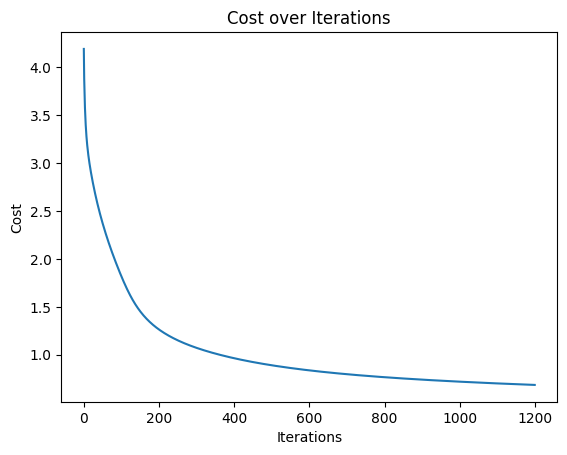

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)

def ReLU_deriv(Z):
    return Z > 0

def softmax(Z):
    exp_Z = np.exp(Z - np.max(Z))  # Added normalization to avoid numerical instability
    return exp_Z / np.sum(exp_Z, axis=0, keepdims=True)

def compute_cost(A2, Y):
    m = Y.shape[1]
    logprobs = np.multiply(np.log(A2), Y) + np.multiply(np.log(1 - A2), 1 - Y)
    cost = -1/m * np.sum(logprobs)
    return cost

def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X.T) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    m = X.shape[0]

    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2, axis=1, keepdims=True)

    dA1 = W2.T.dot(dZ2)
    dZ1 = dA1 * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X)
    db1 = 1 / m * np.sum(dZ1, axis=1, keepdims=True)

    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    return W1, b1, W2, b2

def get_predictions(A2):
    return np.argmax(A2, axis=0)

def get_accuracy(predictions, Y):
    return np.sum(predictions == Y) / Y.size

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    Y = Y.reshape(1, -1)
    costs = []

    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)

        cost = compute_cost(A2, one_hot(Y))
        costs.append(cost)

        if i % 10 == 0:
            predictions = get_predictions(A2)
            accuracy = get_accuracy(predictions, Y.squeeze())
            print("Iteration: ", i, "| Cost: ", cost, "| Accuracy: ", accuracy)

    return W1, b1, W2, b2, costs

# Training the neural network
W1, b1, W2, b2, costs = gradient_descent(X_train, y_train, alpha=0.1, iterations=1200)

# Testing predictions
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)

# Plotting the cost over iterations
plt.plot(costs)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Cost over Iterations")
plt.show()


###### a = 0.01 & iteration = 1500

Iteration:  0 | Cost:  5.871549015877629 | Accuracy:  0.10755
Iteration:  10 | Cost:  4.3868485570581495 | Accuracy:  0.0985
Iteration:  20 | Cost:  3.980463870277416 | Accuracy:  0.10053333333333334
Iteration:  30 | Cost:  3.7539357851141726 | Accuracy:  0.11143333333333333
Iteration:  40 | Cost:  3.599340855981187 | Accuracy:  0.12623333333333334
Iteration:  50 | Cost:  3.4844603893956196 | Accuracy:  0.14288333333333333
Iteration:  60 | Cost:  3.394740531156347 | Accuracy:  0.16243333333333335
Iteration:  70 | Cost:  3.3216922693318094 | Accuracy:  0.18088333333333334
Iteration:  80 | Cost:  3.2598936937313527 | Accuracy:  0.19895
Iteration:  90 | Cost:  3.2057638367410024 | Accuracy:  0.21528333333333333
Iteration:  100 | Cost:  3.157006869621007 | Accuracy:  0.23241666666666666
Iteration:  110 | Cost:  3.112117313791181 | Accuracy:  0.24788333333333334
Iteration:  120 | Cost:  3.070105103877918 | Accuracy:  0.26295
Iteration:  130 | Cost:  3.0302909855111677 | Accuracy:  0.27785
I

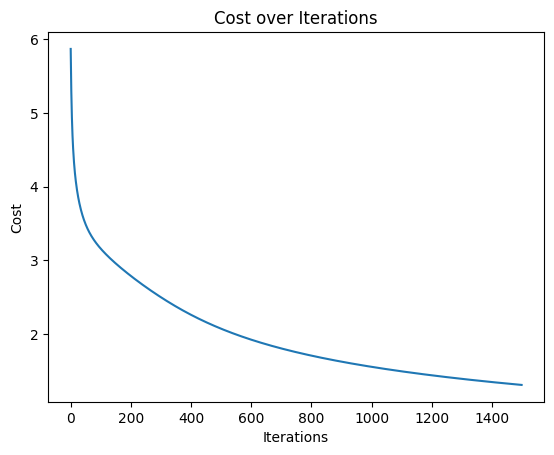

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)

def ReLU_deriv(Z):
    return Z > 0

def softmax(Z):
    exp_Z = np.exp(Z - np.max(Z))  # Added normalization to avoid numerical instability
    return exp_Z / np.sum(exp_Z, axis=0, keepdims=True)

def compute_cost(A2, Y):
    m = Y.shape[1]
    logprobs = np.multiply(np.log(A2), Y) + np.multiply(np.log(1 - A2), 1 - Y)
    cost = -1/m * np.sum(logprobs)
    return cost

def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X.T) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    m = X.shape[0]

    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2, axis=1, keepdims=True)

    dA1 = W2.T.dot(dZ2)
    dZ1 = dA1 * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X)
    db1 = 1 / m * np.sum(dZ1, axis=1, keepdims=True)

    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    return W1, b1, W2, b2

def get_predictions(A2):
    return np.argmax(A2, axis=0)

def get_accuracy(predictions, Y):
    return np.sum(predictions == Y) / Y.size

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    Y = Y.reshape(1, -1)
    costs = []

    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)

        cost = compute_cost(A2, one_hot(Y))
        costs.append(cost)

        if i % 10 == 0:
            predictions = get_predictions(A2)
            accuracy = get_accuracy(predictions, Y.squeeze())
            print("Iteration: ", i, "| Cost: ", cost, "| Accuracy: ", accuracy)

    return W1, b1, W2, b2, costs

# Training the neural network
W1, b1, W2, b2, costs = gradient_descent(X_train, y_train, alpha=0.01, iterations=1500)

# Testing predictions
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)

# Plotting the cost over iterations
plt.plot(costs)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Cost over Iterations")
plt.show()


### Metrics

Top1 Accuracy: 0.879
Top5 Accuracy: 0.9398
Confusion Matrix:
 [[ 946    0    8    0    1   12    7    2    4    0]
 [   0 1101    2    6    0    0    3    2   20    1]
 [  14    9  893   28   17    4   16   13   35    3]
 [   5    1   28  863    0   56    2   21   27    7]
 [   1    3   10    0  861    3   16    4   12   72]
 [  14    2    4   93   14  694   19    4   44    4]
 [  15    2   15    1   16   19  882    0    7    1]
 [   4   18   26    7    4    1    0  912    5   51]
 [   9   13   14   29   22   36   14    7  799   31]
 [   9    6    4    9   80   11    0   42    9  839]]
Precision: 0.8786325064450476
Recall: 0.879
True Positive: 1101
False Positive: 0
True Negative: 946
False Negative: 0


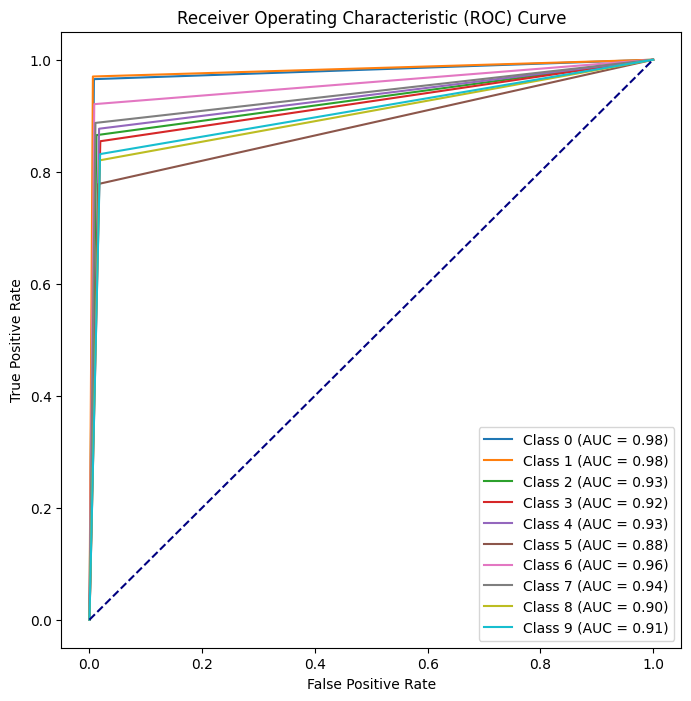

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.metrics import accuracy_score, precision_score, recall_score


def evaluate_model(X, y, W1, b1, W2, b2):
    predictions = make_predictions(X, W1, b1, W2, b2)

    # Top1 and Top5 Accuracy
    top1_accuracy = accuracy_score(y, predictions)

    # One-hot encode the labels for Top5 accuracy
    y_one_hot = label_binarize(y, classes=np.unique(y))
    predictions_one_hot = label_binarize(predictions, classes=np.unique(y))

    # Get Top5 predictions
    top5_predictions = np.argsort(predictions_one_hot, axis=1)[:, -5:]
    top5_accuracy = np.sum(np.any(top5_predictions == y.reshape(-1, 1), axis=1)) / len(y)

    # Confusion matrix
    cm = confusion_matrix(y, predictions)

    # AUC-ROC Curve
    y_one_hot = label_binarize(y, classes=np.unique(y))
    n_classes = len(np.unique(y))
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_one_hot[:, i], predictions_one_hot[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Precision and Recall
    precision = precision_score(y, predictions, average='weighted')
    recall = recall_score(y, predictions, average='weighted')

    # True Positive, False Positive, True Negative, False Negative
    tp = np.sum((y == 1) & (predictions == 1))
    fp = np.sum((y == 0) & (predictions == 1))
    tn = np.sum((y == 0) & (predictions == 0))
    fn = np.sum((y == 1) & (predictions == 0))

    print("Top1 Accuracy:", top1_accuracy)
    print("Top5 Accuracy:", top5_accuracy)
    print("Confusion Matrix:\n", cm)
    print("Precision:", precision)
    print("Recall:", recall)
    print("True Positive:", tp)
    print("False Positive:", fp)
    print("True Negative:", tn)
    print("False Negative:", fn)

    # Plotting AUC-ROC Curve
    plt.figure(figsize=(8, 8))
    for i in range(n_classes):
        plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

# y_test = y_test.values

evaluate_model(X_test, y_test, W1, b1, W2, b2)

In [1]:
import tensorflow as tf
print(tf.__version__)

2.15.0
